# Simple Linear Regression

Linear Regression is the simplest form of regression. The dependent variable is continuous; however, the relationship between the dependent variable and indepedent variables is assumed to be linear. 

# Equation: y = mx + b

y: dependent variable (target)   
x: independent variable (predictor)
m: constant and slope or gradient   
b: intercept


1. There must be a linear relation between independent and dependent variables. 
2. There should not be any outliers present. 
3. No heteroscedasticity 
4. Sample observations should be independent. 
5. Error terms should be normally distributed with mean 0 and constant variance. 
6. Absence of multicollinearity and auto-correlation.



Classification trees have dependent variables that are categorical or label and unordered. Example: Pass or Fail. Regression trees have dependent variables that are continuous values or ordered whole values. Example; Percentages. Regression means to predict the output value using training data. Classification means to group the output into a class. 

Step 1: Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-12-31'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


Single Feature

In [3]:
dataset.columns[4]

'Adj Close'

In [4]:
dataset.columns[0:3]

Index(['Open', 'High', 'Low'], dtype='object')

In [5]:
X = dataset.iloc[ : , 1].values
Y = dataset.iloc[ : , 4].values

In [6]:
print(X.shape)
print(Y.shape)

(2934,)
(2934,)


In [7]:
X = np.array(X).reshape(2934,-1)
Y = np.array(Y).reshape(2934,-1)

In [8]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0) 

Step 2: Fitting Simple Linear Regression Model to the training set

Take data points from the dataset and convert it to training points. Then use training points to fit in the model.

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

Step 3: Predicting the Result

In [10]:
Y_pred = regressor.predict(X_test)

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2200, 1)
(2200, 1)
(734, 1)
(734, 1)


Step 4: Visualization

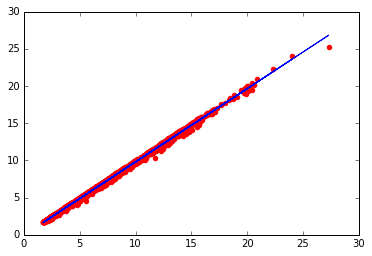

In [12]:
# Visualising the Training results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color ='blue')

In [13]:
regressor.score(X_train, Y_train)

0.99891156684540439

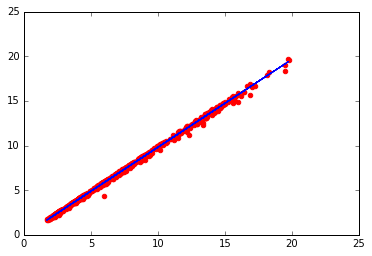

In [14]:
# Visualizing the test results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color ='blue')

In [15]:
# score measure the proportion of correctly classified instances
regressor.score(X_test, Y_test)

0.99857258481942379

Simple Linear Regression (SLR) - Estimated Linear MOdel

In [16]:
# coefficient is a constant by which a variable is multiplied
regressor.coef_

array([[ 0.98362718]])

In [17]:
regressor.intercept_

array([-0.02914215])

In [18]:
# Comparing Score
print("X and Y:", regressor.score(X, Y)) # This compares Y vs Y to give an accuracy measure because Y = predictor.predict(X). If calculate the raw data of X and Y; therefore, is okay.  
print("X_train and Y_train:",regressor.score(X_train, Y_train)) # This measure the accuracy of training data
print("X_test and Y_test:",regressor.score(X_test, Y_test)) # This measure the accuracy of test data and is similar to classification_report 
print("X_test and Y_test:",regressor.score(X_test, Y_pred)) # This is not correct because it always give 1.0 and the library had calculated
print("Y_test and Y_pred:",regressor.score(Y_test, Y_pred)) # This accuracy of percentage is correct predictions

X and Y: 0.998831288103
X_train and Y_train: 0.998911566845
X_test and Y_test: 0.998572584819
X_test and Y_test: 1.0
Y_test and Y_pred: 0.996908613047


In [19]:
import statsmodels.api as sm

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.508e+06
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:07:32   Log-Likelihood:                 1571.7
No. Observations:                2934   AIC:                            -3139.
Df Residuals:                    2932   BIC:                            -3127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0264      0.005     -5.219      0.0

LEAST SQUARES METHOD

Least Squares Method is the most common method for fitting a regression line. This method is used for to calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line.

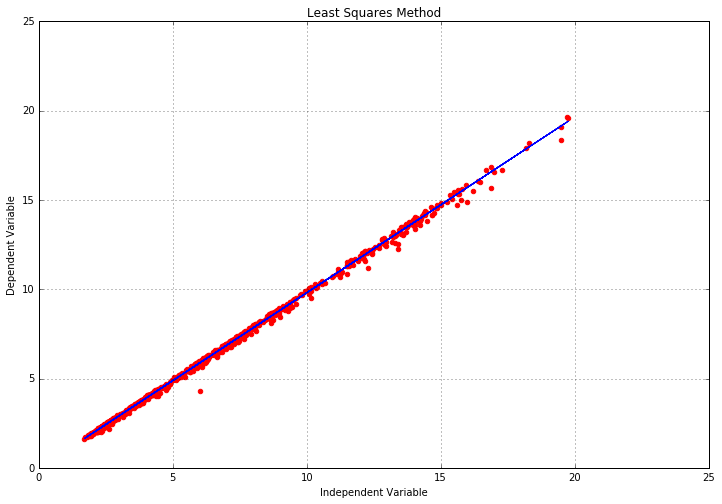

In [20]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color ='blue')
#plt.errorbar(X_test, Y_test, yerr=0.5, fmt='o', color='black',
#             ecolor='lightgray', elinewidth=3, capsize=0);
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")
plt.title("Least Squares Method")

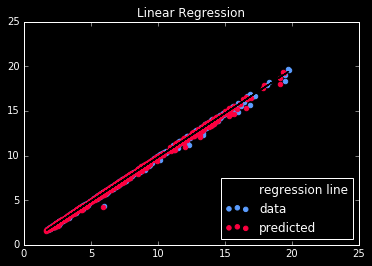

In [23]:
from matplotlib import style
style.use('dark_background')

plt.title('Linear Regression')
plt.scatter(X_test, Y_test,color='#5b9dff',label='data')
plt.scatter(regressor.predict(X_test), regressor.predict(Y_test), color='#fc003f', label="predicted")
plt.plot(X_test,regressor.predict(X_test), color='000000', label='regression line')
plt.legend(loc=4)